Usando lib unsloth

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/LLM/finetune_hate_speech/git'

/content/drive/MyDrive/Colab Notebooks/LLM/finetune_hate_speech/git


In [3]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/LLM/finetune_hate_speech/git'

In [4]:
%%capture
# Installs Unsloth, Xformers (Flash Attention) and all other packages!
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps xformers "trl<0.9.0" peft accelerate bitsandbytes


In [5]:
!pip install triton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 4.5 MB/s eta 0:00:00


In [6]:
# import pandas as pd
# import torch
# from transformers import AutoTokenizer
# from unsloth import FastLanguageModel, unsloth_save_model
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# import os

# # Define o formato do prompt Alpaca
# alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

# ### Instruction:
# {}

# ### Input:
# {}

# ### Response:
# {}"""

# # Função para formatar os dados para inferência
# def formatar_para_inferencia(dados, instruction):
#     dados_finetune = []
#     for _, row in dados.iterrows():
#         texto = row['text']
#         prompt_formatado = alpaca_prompt.format(instruction, texto, "")
#         dados_finetune.append({'input': texto, 'instruction': instruction, 'text': prompt_formatado})

#     return pd.DataFrame(dados_finetune)

# # Função para classificar texto com o modelo treinado
# def classificar_texto(texto, model, tokenizer, alpaca_prompt, instruction):
#     prompt = alpaca_prompt.format(instruction, texto, "")
#     inputs = tokenizer([prompt], return_tensors='pt').to('cuda')
#     outputs = model.generate(**inputs, max_new_tokens=50)
#     response = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

#     # Extrair a última linha relevante da resposta
#     response_lines = response.split('\n')
#     for line in reversed(response_lines):
#         line = line.strip()
#         if line.lower() in ["sim", "não"]:
#             return line.lower(), response.strip()
#     return response.strip(), response.strip()

# # Função para carregar os resultados parciais, se existirem
# def carregar_resultados_parciais(resultados_csv):
#     if os.path.exists(resultados_csv):
#         return pd.read_csv(resultados_csv)
#     else:
#         return pd.DataFrame()

# # Função principal para inferência
# def inferir(model_dir='./models', instruction=None, output_dir='./outputs'):

#     # Instrução utilizada durante o treinamento
#     if instruction is None:
#         instruction = "Considere o seguinte texto extraído de uma rede social. Classifique-o como 'sim' se contiver discurso de ódio, ofensas, agressões ou qualquer forma de toxicidade, levando em conta o uso de gírias e a linguagem informal. Caso contrário, classifique como 'não':"

#     # Carregar o modelo treinado para inferência
#     model, tokenizer = FastLanguageModel.from_pretrained(
#         model_name=model_dir,
#         max_seq_length=2048,
#         dtype=None,
#         load_in_4bit=True
#     )

#     FastLanguageModel.for_inference(model)

#     # Carregar os dados de teste
#     arquivo_csv_teste = '../data/test_toldbr.csv'
#     dados_teste = pd.read_csv(arquivo_csv_teste)

#     # Formatar os dados de teste para inferência
#     test_df = formatar_para_inferencia(dados_teste, instruction)

#     # Criar diretório de saída se não existir
#     os.makedirs(output_dir, exist_ok=True)
#     resultados_csv = os.path.join(output_dir, f'{os.path.basename(model_dir)}_resultados_classificacao.csv')

#     # Carregar resultados parciais
#     resultados_parciais = carregar_resultados_parciais(resultados_csv)

#     # Verificar quantas inferências já foram feitas
#     num_inferencias_realizadas = len(resultados_parciais)
#     print(f"Retomando a partir da inferência {num_inferencias_realizadas + 1}...")

#     # Classificar cada tweet usando o modelo treinado, retomando de onde parou
#     for idx in range(num_inferencias_realizadas, len(test_df)):
#         tweet = test_df.iloc[idx]['input']
#         resultado, resposta_completa = classificar_texto(tweet, model, tokenizer, alpaca_prompt, instruction)
#         print(f"Tweet: {tweet}")
#         print(f"Resposta do modelo: {resultado}")

#         # Salvar o resultado
#         dados_teste.loc[idx, 'Classificação_Modelo'] = 1 if resultado == 'sim' else 0
#         dados_teste.loc[idx, 'Resposta_Modelo'] = resposta_completa

#         # A cada 50 inferências, salvar os resultados parciais
#         if (idx + 1) % 50 == 0:
#             dados_teste.iloc[:idx + 1].to_csv(resultados_csv, index=False)
#             print(f"Checkpoint salvo em {resultados_csv} até a inferência {idx + 1}.")

#     # Salvar resultados finais
#     dados_teste.to_csv(resultados_csv, index=False)
#     print(f"Classificação concluída e resultados salvos em {resultados_csv}.")

#     # Calcular métricas
#     true_labels = dados_teste['Toxic']
#     predicted_labels = dados_teste['Classificação_Modelo']

#     precision = precision_score(true_labels, predicted_labels)
#     recall = recall_score(true_labels, predicted_labels)
#     f1 = f1_score(true_labels, predicted_labels)
#     accuracy = (true_labels == predicted_labels).mean()

#     print("F1-Score:", f1)
#     print("Precision:", precision)
#     print("Recall:", recall)
#     print("Accuracy:", accuracy)

#     # Salvar métricas
#     metrics_file = os.path.join(output_dir, f'{os.path.basename(model_dir)}_metrics_exp3_v2.txt')
#     with open(metrics_file, 'w') as f:
#         f.write(f"F1-Score: {f1}\n")
#         f.write(f"Precision: {precision}\n")
#         f.write(f"Recall: {recall}\n")
#         f.write(f"Accuracy: {accuracy}\n")

#     # Plotar e salvar a matriz de confusão
#     cm = confusion_matrix(true_labels, predicted_labels)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
#     disp.plot(cmap=plt.cm.Blues)

#     confusion_matrix_file = os.path.join(output_dir, f'{os.path.basename(model_dir)}_confusion_matrix_exp3_v2.png')
#     plt.savefig(confusion_matrix_file)
#     plt.show()

#     print(f"Métricas salvas em {metrics_file}")
#     print(f"Matriz de confusão salva em {confusion_matrix_file}")



# instruction_GA = ("Considere o seguinte texto extraído de uma rede social. Classifique-o como 'sim' se contiver discurso de ódio, ofensas, agressões ou qualquer forma de toxicidade, levando em conta o uso de gírias e a linguagem informal. Caso contrário, classifique como 'não':")

# # Executar o código com parâmetros definidos
# inferir(model_dir='./models/llama_31_FT_r_16_alpha_16', output_dir='./outputs', instruction=instruction_GA)


In [7]:
# import pandas as pd
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Função para calcular métricas após a classificação
# def calcular_metricas(resultados_csv, output_dir='./outputs'):
#     # Carregar os dados de classificação
#     dados_classificados = pd.read_csv(resultados_csv)

#     # Verificar se há valores NaN e substituí-los por uma classe padrão, por exemplo, 0 (não tóxico)
#     dados_classificados['Classificação_Modelo'] = dados_classificados['Classificação_Modelo'].fillna(0).astype(int)

#     # Obter os rótulos verdadeiros e as previsões do modelo
#     true_labels = dados_classificados['Toxic'].astype(int)
#     predicted_labels = dados_classificados['Classificação_Modelo']

#     # Calcular as métricas
#     precision = precision_score(true_labels, predicted_labels)
#     recall = recall_score(true_labels, predicted_labels)
#     f1 = f1_score(true_labels, predicted_labels)
#     accuracy = accuracy_score(true_labels, predicted_labels)

#     print("F1-Score:", f1)
#     print("Precision:", precision)
#     print("Recall:", recall)
#     print("Accuracy:", accuracy)

#     # Salvar as métricas em um arquivo
#     metrics_file = os.path.join(output_dir, 'metrics_resultados_classificacao.txt')
#     with open(metrics_file, 'w') as f:
#         f.write(f"F1-Score: {f1}\n")
#         f.write(f"Precision: {precision}\n")
#         f.write(f"Recall: {recall}\n")
#         f.write(f"Accuracy: {accuracy}\n")

#     # Plotar e salvar a matriz de confusão
#     cm = confusion_matrix(true_labels, predicted_labels)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
#     disp.plot(cmap=plt.cm.Blues)

#     confusion_matrix_file = os.path.join(output_dir, 'confusion_matrix_resultados_classificacao.png')
#     plt.savefig(confusion_matrix_file)
#     plt.show()

#     print(f"Métricas salvas em {metrics_file}")
#     print(f"Matriz de confusão salva em {confusion_matrix_file}")

# # Executar o cálculo das métricas
# calcular_metricas(resultados_csv='./outputs/llama_31_FT_r_16_alpha_16_resultados_classificacao.csv', output_dir='./outputs')


# nova versao

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.8: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.0+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.27.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

Unsloth 2024.8 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


Retomando a partir da inferência 1...
Prompt:
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Considere o seguinte texto extraído de uma rede social. Classifique-o como 'sim' se contiver discurso de ódio, ofensas, agressões ou qualquer forma de toxicidade, levando em conta o uso de gírias e a linguagem informal. Caso contrário, classifique como 'não':

### Input:
rt @user a maior ilusão coletiva do twitter https://t.co/xi24wxb4wp

### Response:

Resposta:
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Considere o seguinte texto extraído de uma rede social. Classifique-o como'sim' se contiver discurso de ódio, ofensas, agressões ou qualquer forma de toxicidade, levando em conta o uso de gírias e a linguagem informal. Caso contrário, c

<ipython-input-8-9b3bbe40a315>:107: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NaN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dados_teste.loc[idx, 'Classificação_Modelo'] = 'NaN'  # Ou algum outro valor padrão


A saída de streaming foi truncada nas últimas 5000 linhas.
### Instruction:
Considere o seguinte texto extraído de uma rede social. Classifique-o como 'sim' se contiver discurso de ódio, ofensas, agressões ou qualquer forma de toxicidade, levando em conta o uso de gírias e a linguagem informal. Caso contrário, classifique como 'não':

### Input:
- tinha que matar esse fdp , tmnc .

### Response:

Resposta:
Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Considere o seguinte texto extraído de uma rede social. Classifique-o como'sim' se contiver discurso de ódio, ofensas, agressões ou qualquer forma de toxicidade, levando em conta o uso de gírias e a linguagem informal. Caso contrário, classifique como 'não':

### Input:
- tinha que matar esse fdp, tmnc.

### Response:
sim

### Instruction:
Considere o seguinte texto extraído de uma rede social. Classifique-o co

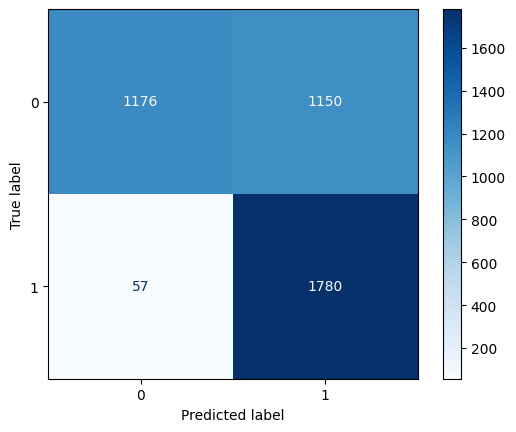

Métricas salvas em ./outputs/llama_31_FT_r_16_alpha_16_metrics_exp3_v2.txt
Matriz de confusão salva em ./outputs/llama_31_FT_r_16_alpha_16_confusion_matrix_exp3_v2.png


In [8]:
import pandas as pd
import torch
from transformers import AutoTokenizer
from unsloth import FastLanguageModel, unsloth_save_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Define o formato do prompt Alpaca
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

# Função para formatar os dados para inferência
def formatar_para_inferencia(dados, instruction):
    dados_finetune = []
    for _, row in dados.iterrows():
        texto = row['text']
        prompt_formatado = alpaca_prompt.format(instruction, texto, "")
        dados_finetune.append({'input': texto, 'instruction': instruction, 'text': prompt_formatado})

    return pd.DataFrame(dados_finetune)

# Função para classificar texto com o modelo treinado
def classificar_texto(texto, model, tokenizer, alpaca_prompt, instruction):
    prompt = alpaca_prompt.format(instruction, texto, "")
    inputs = tokenizer([prompt], return_tensors='pt').to('cuda')
    outputs = model.generate(**inputs, max_new_tokens=50)
    response = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

    # Debug: mostrar prompt e resposta
    print(f"Prompt:\n{prompt}")
    print(f"Resposta:\n{response}\n")

    # Extrair a última linha relevante da resposta
    response_lines = response.strip().split('\n')
    for line in reversed(response_lines):
        line = line.strip().lower()
        if line == "sim":
            return 1, response.strip()
        elif line == "não":
            return 0, response.strip()

    # Se não encontrar "sim" ou "não", retorna indefinido
    return None, response.strip()

# Função para carregar os resultados parciais, se existirem
def carregar_resultados_parciais(resultados_csv):
    if os.path.exists(resultados_csv):
        return pd.read_csv(resultados_csv)
    else:
        return pd.DataFrame()

# Função principal para inferência
def inferir(model_dir='./models', instruction=None, output_dir='./outputs'):

    # Instrução utilizada durante o treinamento
    if instruction is None:
        instruction = "Considere o seguinte texto extraído de uma rede social. Classifique-o como 'sim' se contiver discurso de ódio, ofensas, agressões ou qualquer forma de toxicidade, levando em conta o uso de gírias e a linguagem informal. Caso contrário, classifique como 'não':"

    # Carregar o modelo treinado para inferência
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name=model_dir,
        max_seq_length=2048,
        dtype=None,
        load_in_4bit=True
    )

    FastLanguageModel.for_inference(model)

    # Carregar os dados de teste
    arquivo_csv_teste = '../data/test_toldbr.csv'
    dados_teste = pd.read_csv(arquivo_csv_teste)

    # Formatar os dados de teste para inferência
    test_df = formatar_para_inferencia(dados_teste, instruction)

    # Criar diretório de saída se não existir
    os.makedirs(output_dir, exist_ok=True)
    resultados_csv = os.path.join(output_dir, f'{os.path.basename(model_dir)}_resultados_classificacao.csv')

    # Carregar resultados parciais
    resultados_parciais = carregar_resultados_parciais(resultados_csv)

    # Verificar quantas inferências já foram feitas
    num_inferencias_realizadas = len(resultados_parciais)
    print(f"Retomando a partir da inferência {num_inferencias_realizadas + 1}...")

    # Classificar cada tweet usando o modelo treinado, retomando de onde parou
    for idx in range(num_inferencias_realizadas, len(test_df)):
        tweet = test_df.iloc[idx]['input']
        resultado, resposta_completa = classificar_texto(tweet, model, tokenizer, alpaca_prompt, instruction)
        print(f"Tweet: {tweet}")
        print(f"Resposta do modelo: {resultado}")

        # Salvar o resultado
        if resultado is not None:
            dados_teste.loc[idx, 'Classificação_Modelo'] = resultado
        else:
            dados_teste.loc[idx, 'Classificação_Modelo'] = 'NaN'  # Ou algum outro valor padrão

        dados_teste.loc[idx, 'Resposta_Modelo'] = resposta_completa

        # A cada 50 inferências, salvar os resultados parciais
        if (idx + 1) % 50 == 0:
            dados_teste.iloc[:idx + 1].to_csv(resultados_csv, index=False)
            print(f"Checkpoint salvo em {resultados_csv} até a inferência {idx + 1}.")

    # Salvar resultados finais
    dados_teste.to_csv(resultados_csv, index=False)
    print(f"Classificação concluída e resultados salvos em {resultados_csv}.")

    # Calcular métricas
    true_labels = dados_teste['Toxic']
    predicted_labels = dados_teste['Classificação_Modelo'].replace('NaN', 0).astype(int)

    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    accuracy = (true_labels == predicted_labels).mean()

    print("F1-Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)

    # Salvar métricas
    metrics_file = os.path.join(output_dir, f'{os.path.basename(model_dir)}_metrics_exp3_v2.txt')
    with open(metrics_file, 'w') as f:
        f.write(f"F1-Score: {f1}\n")
        f.write(f"Precision: {precision}\n")
        f.write(f"Recall: {recall}\n")
        f.write(f"Accuracy: {accuracy}\n")

    # Plotar e salvar a matriz de confusão
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)

    confusion_matrix_file = os.path.join(output_dir, f'{os.path.basename(model_dir)}_confusion_matrix_exp3_v2.png')
    plt.savefig(confusion_matrix_file)
    plt.show()

    print(f"Métricas salvas em {metrics_file}")
    print(f"Matriz de confusão salva em {confusion_matrix_file}")

instruction_GA = ("Considere o seguinte texto extraído de uma rede social. Classifique-o como 'sim' se contiver discurso de ódio, ofensas, agressões ou qualquer forma de toxicidade, levando em conta o uso de gírias e a linguagem informal. Caso contrário, classifique como 'não':")

# Executar o código com parâmetros definidos
inferir(model_dir='./models/llama_31_FT_r_16_alpha_16', output_dir='./outputs', instruction=instruction_GA)
